# Homework 4: Modeling Text Data

### Team Member 1:
* UNI:  fak2116
* Name: Fatima Koli

### Team Member 2 [optional]:
* UNI:  
* Name:


you can find the data here: https://data.boston.gov/dataset/vision-zero-entry

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler, Normalizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import HashingVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.decomposition import NMF, LatentDirichletAllocation
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(precision=3, suppress=True)
#plt.style.use(['fivethirtyeight'])

                   A         B         C         D
2013-01-01  0.974287  0.775103 -1.350591 -0.679619
2013-01-02 -3.175586  0.666116 -2.063628 -0.091016
2013-01-03  2.377929 -0.983502  0.326536 -1.041644
2013-01-04 -0.492742 -2.093464 -0.695235 -0.075744
2013-01-05  0.009840  1.107730 -0.517053 -0.438369
2013-01-06 -0.305800 -1.952389 -0.481098  0.878091


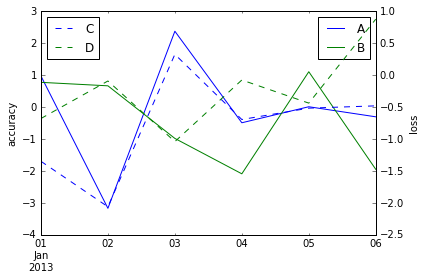

In [5]:
#TEST FOR SOMETHING ELSE
#dates = pd.date_range('20130101',periods=6)
#df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
#print (df)
#df[['A', 'B']].plot()
#plt.ylabel("accuracy")
#df[['C', 'D']].plot(linestyle='--', ax=plt.twinx())
#plt.ylabel("loss")
#fig = plt.gcf()
#fig.savefig("test.png")

# Task1 - Data Cleaning  [10 points]

Load the data, visualize the class distribution. Clean up the target labels. Some categories have been arbitrarildata['target'] split and need to be consolidated. 

In [2]:
# Add your code for task 1 here. You may use multiple cells. 
data = pd.read_csv('Vision_Zero_Entry.csv')
print (data.shape)
print (data.columns)

(8543, 11)
Index(['﻿X', 'Y', 'OBJECTID', 'GLOBALID', 'REQUESTID', 'REQUESTTYPE',
       'REQUESTDATE', 'STATUS', 'STREETSEGID', 'COMMENTS', 'USERTYPE'],
      dtype='object')


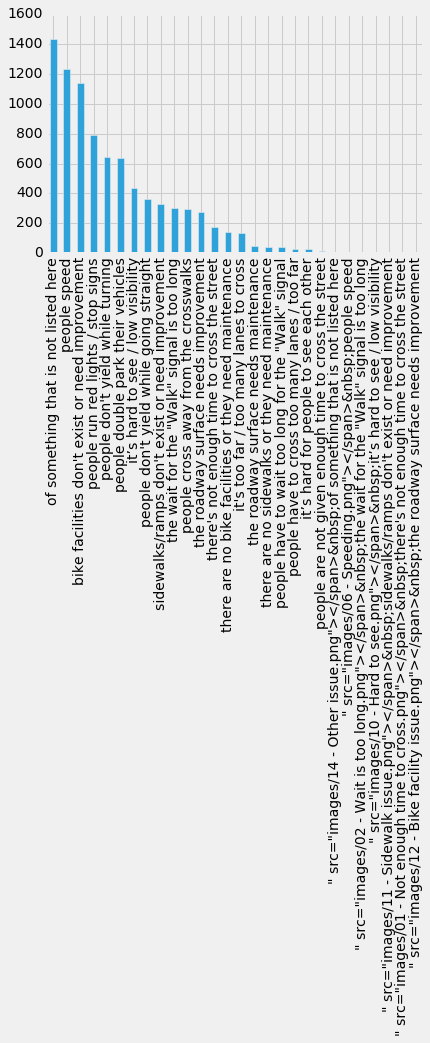

In [3]:
target = 'REQUESTTYPE'
y = data[target]
plt.style.use(['fivethirtyeight'])
y.value_counts().plot(kind='bar')

In [4]:
#get the categories in order to be able to figure out how to combine them
categories = y.unique()
print (y.dtype)
#for i in categories: 
#    print (i)

object


Based on the categories printed above, here are the new categories, with "////" in between the different options that are being consolidated: 
1. bike facilities don't exist or need improvement //// there are no bike facilities or they need maintenance
2. of something that is not listed here ////" src="images/14 - Other issue.png"></span>&nbsp;of something that is not listed here
3. people don't yield while going straight //// people don't yield while turning
4. it’s hard to see / low visibility  ////" src="images/10 - Hard to see.png"></span>&nbsp;it’s hard to see / low visibility ///it’s hard for people to see each other
5. people double park their vehicles
6. sidewalks/ramps don't exist or need improvement ////" src="images/11 - Sidewalk issue.png"></span>&nbsp;sidewalks/ramps don't exist or need improvement ////there are no sidewalks or they need maintenance
7. people speed  ///" src="images/06 - Speeding.png"></span>&nbsp;people speed
8. people cross away from the crosswalks
9. people run red lights / stop signs
10. the roadway surface needs maintenance  ////" src="images/12 - Bike facility issue.png"></span>&nbsp;the roadway surface needs improvement  ////the roadway surface needs improvement
11. people have to cross too many lanes/ too far / not enough time (not an original label, consolidation of all of the following:) ////people have to cross too many lanes / too far  /////it's too far / too many lanes to cross ////there's not enough time to cross the street //// people are not given enough time to cross the street ////" src="images/01 - Not enough time to cross.png"></span>&nbsp;there's not enough time to cross the street
12. people have to wait too long for the "Walk" signal////" src="images/02 - Wait is too long.png"></span>&nbsp;the wait for the "Walk" signal is too long ////the wait for the "Walk" signal is too long


In [5]:
for i in np.arange(y.shape[0]):
    col = y.iloc[i]
    if col == 'there are no bike facilities or they need maintenance': 
        y.iloc[i] = "bike facilities don't exist or need improvement"
    elif col == '" src="images/14 - Other issue.png"></span>&nbsp;of something that is not listed here': 
        y.iloc[i] = "of something that is not listed here"
    elif col == "people don't yield while going straight": 
        y.iloc[i] = "people don't yield while going straight/turning"
    elif col == "people don't yield while turning": 
        y.iloc[i] = "people don't yield while going straight/turning"
    elif col == '" src="images/10 - Hard to see.png"></span>&nbsp;it’s hard to see / low visibility': 
        y.iloc[i] = "it’s hard to see / low visibility"
    elif col == 'it’s hard for people to see each other': 
        y.iloc[i] = "it’s hard to see / low visibility"
    elif col == "\" src=\"images/11 - Sidewalk issue.png\"></span>&nbsp;sidewalks/ramps don't exist or need improvement": 
        y.iloc[i] = "sidewalks/ramps don't exist or need improvement"
    elif col == 'there are no sidewalks or they need maintenance': 
        y.iloc[i] = "sidewalks/ramps don't exist or need improvement"
    elif col == '" src="images/06 - Speeding.png"></span>&nbsp;people speed': 
        y.iloc[i] = "people speed"
    elif col == '" src="images/12 - Bike facility issue.png"></span>&nbsp;the roadway surface needs improvement': 
        y.iloc[i] = "the roadway surface needs maintenance"
    elif col == 'the roadway surface needs improvement': 
        y.iloc[i] = "the roadway surface needs maintenance" 
    elif col == "it's too far / too many lanes to cross": 
        y.iloc[i] = "people have to cross too many lanes / too far /not enough time to cross"
    elif col == "people have to cross too many lanes / too far": 
        y.iloc[i] = "people have to cross too many lanes / too far /not enough time to cross"
    elif col == "\" src=\"images/01 - Not enough time to cross.png\"></span>&nbsp;there's not enough time to cross the street": 
        y.iloc[i] = "people have to cross too many lanes / too far /not enough time to cross"
    elif col == "people are not given enough time to cross the street": 
        y.iloc[i] = "people have to cross too many lanes / too far /not enough time to cross"
    elif col == "there's not enough time to cross the street": 
        y.iloc[i] = "people have to cross too many lanes / too far /not enough time to cross"
    elif col == "\" src=\"images/02 - Wait is too long.png\"></span>&nbsp;the wait for the \"Walk\" signal is too long": 
        y.iloc[i] = "the wait for the \"Walk\" signal is too long"
    elif col == "people have to wait too long for the \"Walk\" signal": 
        y.iloc[i] = "the wait for the \"Walk\" signal is too long"

C:\Users\Fatima\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
#y.value_counts().plot(kind='bar')

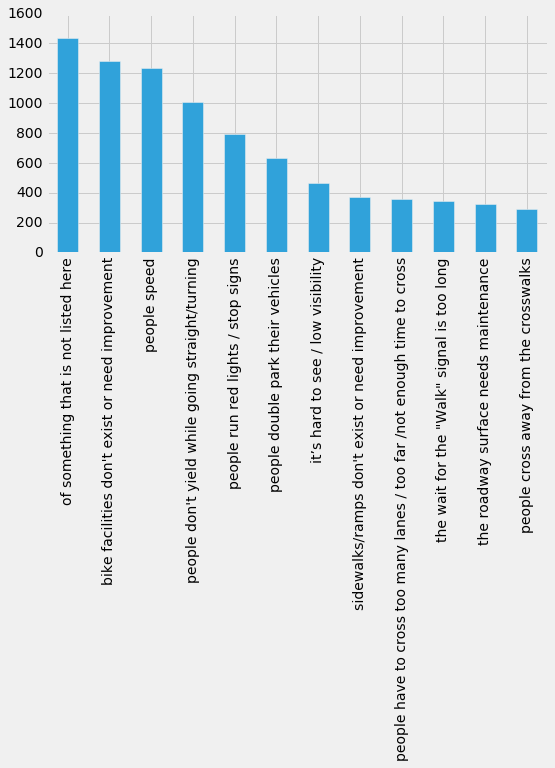

In [6]:
plt.figure(figsize=(8, 4))
(y.value_counts()).plot(kind='bar')

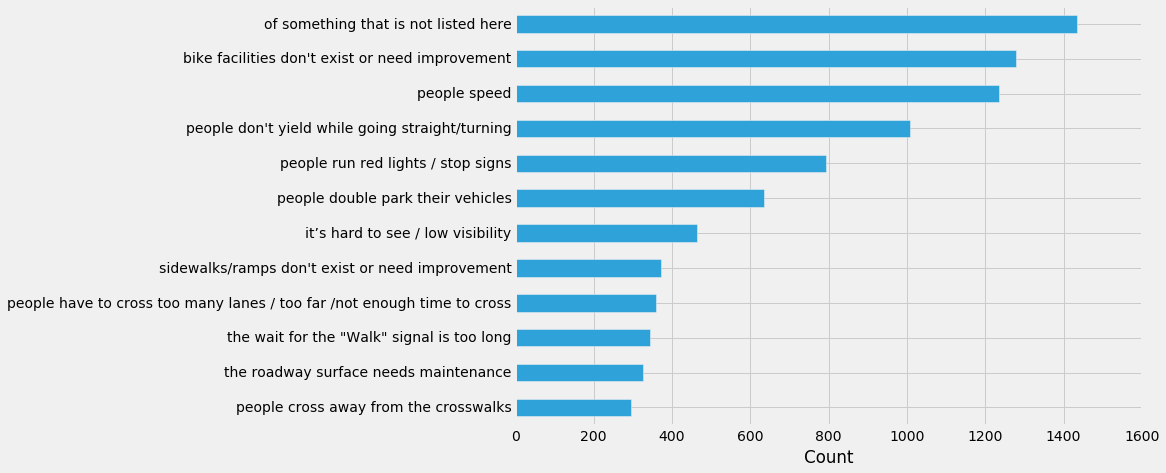

In [7]:
plt.figure(figsize=(10,7))
cnt=y.value_counts().sort_values(ascending=False)
ax=plt.gca()
cnt.plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_xlabel('Count')
plt.show()

In [8]:
pd.concat([data.apply(lambda x: sum(x.isnull())).rename("num_missing")], axis=1)

,num_missing
﻿X,0
Y,0
OBJECTID,0
GLOBALID,8543
REQUESTID,11
REQUESTTYPE,0
REQUESTDATE,0
STATUS,0
STREETSEGID,0
COMMENTS,1888


In [9]:
data['target'] = y
mask = data['COMMENTS'].isnull()
data=data[~mask]
#data = data[np.isnull(data['COMMENTS'])]
pd.concat([data.apply(lambda x: sum(x.isnull())).rename("num_missing")], axis=1)

,num_missing
﻿X,0
Y,0
OBJECTID,0
GLOBALID,6655
REQUESTID,11
REQUESTTYPE,0
REQUESTDATE,0
STATUS,0
STREETSEGID,0
COMMENTS,0


In [10]:
data.shape

(6655, 12)

In [11]:
text_train = data['COMMENTS']

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['target']= le.fit_transform(data['target'])
print (data['target'].value_counts())

2     1427
0      910
8      746
4      725
7      662
5      430
1      420
9      343
10     256
3      255
6      242
11     239
Name: target, dtype: int64


In [13]:
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'pandas.core.series.Series'>
length of text_train: 6655
text_train[1]:
This intersection is dangerous. Cars don't follow the lane markings (ie go straight while in turn lane) so it's nearly impossible to safely position yourself on a bike. In a car, people are trying to move over/it's unclear where people are going.


In [14]:
text_train_sub, text_val, y_train_sub, y_val = train_test_split(
    text_train, data['target'], stratify=data['target'], random_state=0)

# Task2 - Model 1 [10 points]

Run a baseline multi-class classification model using a bag-of-word approach, report macro f1-score (should be above .5) and visualize the confusion matrix. Can you interpret the mistakes made by the model? 

CountVectorizer with LR

In [15]:
# Add your code for task 2 here. You may use multiple cells. 
vect1 = CountVectorizer(stop_words='english', min_df=4, token_pattern=r"\b\w[\w’]+\b")
X_train = vect1.fit_transform(text_train_sub.values.astype('U'))
X_val = vect1.transform(text_val.values.astype('U'))
print (X_train.shape)

(4991, 1701)


In [16]:
#it's unclear why the two scores are coming out different, but I am using the second
#score as the correct one
lr = LogisticRegressionCV(scoring='f1_macro').fit(X_train, y_train_sub)
print (lr.C_)
print (lr.score(X_val, y_val))
print ('F1-score: %f'% f1_score(y_val, lr.predict(X_val), average='macro'))

C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[  2.783   2.783   2.783   2.783   2.783   2.783  21.544   2.783   2.783
  21.544  21.544   2.783]
0.591346153846
F1-score: 0.564547


In [17]:
#runnning multinomial regression on same transformed array
lr = LogisticRegressionCV(scoring='f1_macro').fit(X_train, y_train_sub)
print (lr.C_)
print (lr.score(X_val, y_val))
print ('F1-score: %f'% f1_score(y_val, lr.predict(X_val), average='macro'))

C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[  2.783   2.783   2.783   2.783   2.783   2.783  21.544   2.783   2.783
  21.544  21.544   2.783]
0.591346153846
F1-score: 0.564547


In [18]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict (X_val)
print(confusion_matrix(y_val, y_pred))

[[181   0  19   0   6   5   2   2   7   3   3   0]
 [  2  67  16   2   9   0   1   1   5   1   0   1]
 [ 30  15 182  12  33  12   9  24  19  15   3   3]
 [  1   2  18  19   7   3   4   2   5   2   0   1]
 [  5   3  37   4  96   2   2  10  16   2   1   3]
 [  6   5  14   1   1  76   0   0   3   0   1   0]
 [  2   4  22   1   7   0   9   4   3   1   1   6]
 [  0   0  24   1  14   0   4 112   7   0   0   3]
 [  7   9  18   1   8   0   4  10 128   1   0   1]
 [  2   2  17   4   1   0   2   0   7  47   2   2]
 [ 12   0  11   2   0   1   1   0   4   2  31   0]
 [  1   0  10   1   3   0   5   4   0   0   0  36]]


Many of the values are being mispredicted as 3, or "people speed". There is a strong relationship of being mispredicted between 3 and 5, "people speed" and "people run red lights/stop signs" which makes sense. Values that are actually 3 are also pretty mispredicted throughout the labels. 

In [19]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    ax.bar(myrange, coef[important])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=60, ha="right")

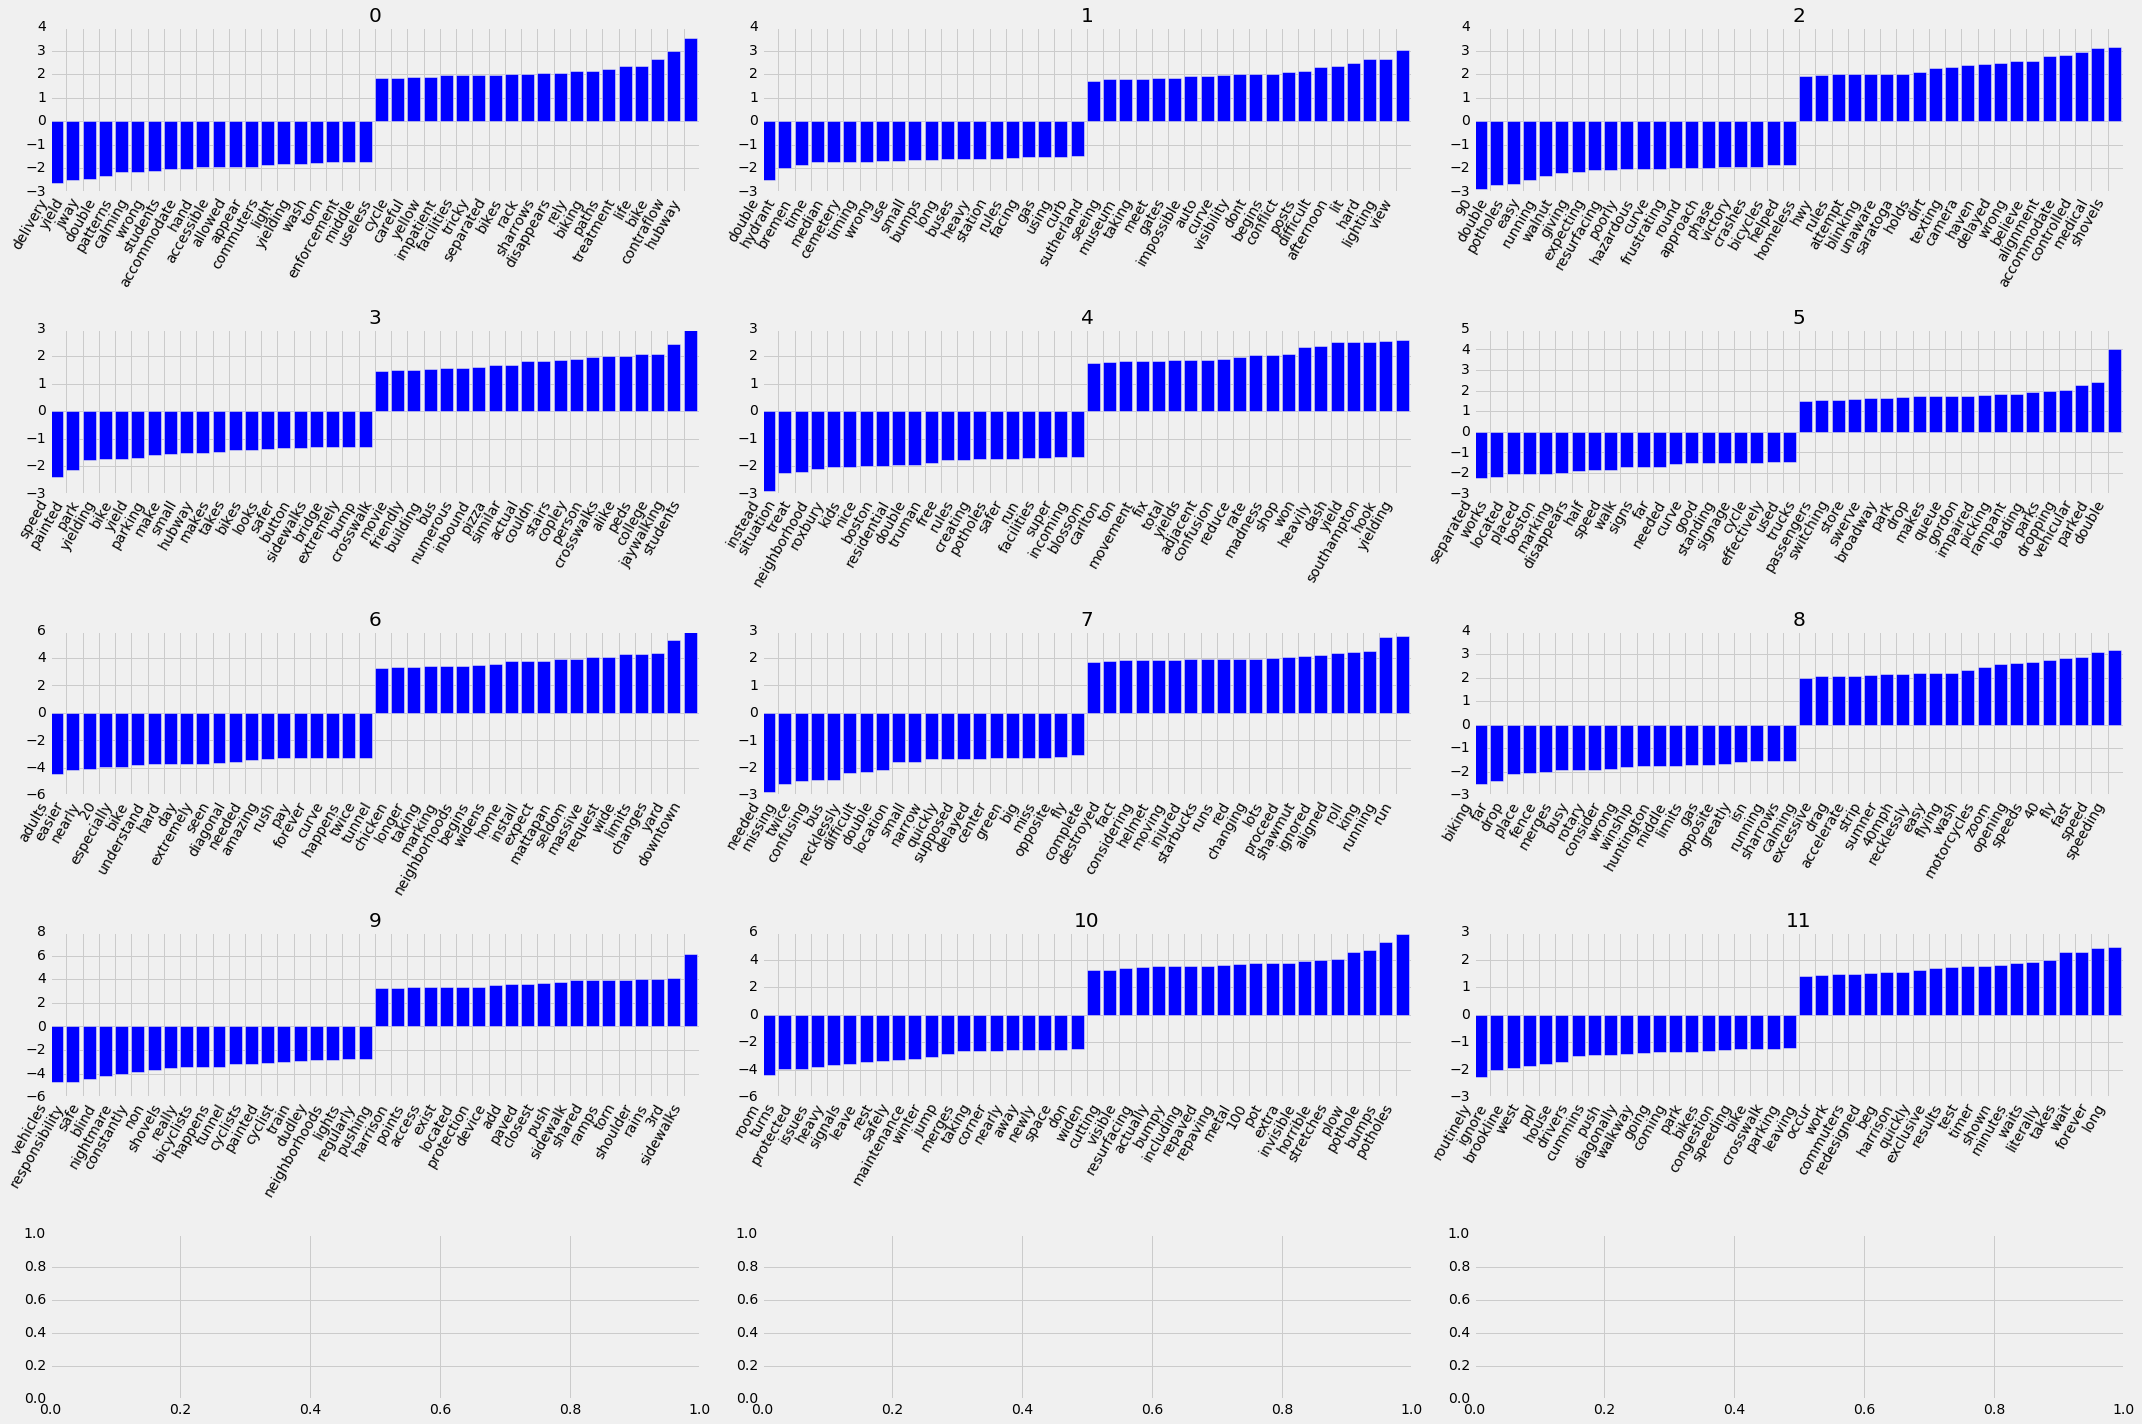

In [20]:
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
n_classes = len(lr.classes_)
feature_names=np.array(vect1.get_feature_names())
fig, axes = plt.subplots(n_classes // 3 + 1, 3, figsize=(30, 20))
for ax, coef, label in zip(axes.ravel(), lr.coef_, lr.classes_):
    ax.set_title(label)
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
plt.tight_layout()

#plt.figure(figsize=(15, 4))
#plot_important_features(lr.coef_.ravel(), np.array(vect1.get_feature_names()), top_n=20)

In [21]:
#Trying one more pipe before moving on to the second part
bow_pipe = make_pipeline(CountVectorizer(stop_words='english', min_df=5, token_pattern=r"\b\w[\w’]+\b"), LogisticRegressionCV(multi_class='multinomial'))
cross_val_score(bow_pipe, text_train_sub.values.astype('U'), y_train_sub, cv=5, scoring='f1_macro')

array([ 0.534,  0.596,  0.546,  0.589,  0.574])

In [22]:
bow_pipe.fit(text_train_sub.astype('U'), y_train_sub)

Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words='english...    random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0))])

In [23]:
print ('F1-score: %f'% f1_score(y_val, bow_pipe.predict(text_val.astype('U')), average='macro'))

F1-score: 0.572899


# Task3 - Model 2 [30 points]

Improve the model using more complex text features, including n-grams, character n-grams and possibly domain-specific features.

In [87]:
#param_grid = {"logisticregression__C": [100, 1, 0.001],
#              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 5),
#                                               (2, 3), (3, 8), (5, 5)],
#              "tfidfvectorizer__min_df": [2, 3, 4],
#              "normalizer": [None, Normalizer()]
#            }
#grid = GridSearchCV(make_pipeline(TfidfVectorizer(stop_words='english', token_pattern=r"\b\w[\w’]+\b"), Normalizer(), LogisticRegression()),
#                    param_grid=param_grid, cv=5, scoring="f1_macro")
#                   
#grid.fit(text_train_sub.values.astype('U'), y_train_sub.values)
#print (grid.best_score_)
#print (grid.best_params_)

C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metr

0.572342959027
{'tfidfvectorizer__ngram_range': (1, 5), 'normalizer': None, 'tfidfvectorizer__min_df': 2, 'logisticregression__C': 100}


In [88]:
#Lets look at the top 10 results:
#cols = ['mean_test_score','std_test_score','param_tfidfvectorizer__min_df','param_tfidfvectorizer__ngram_range', 'param_logisticregression__C', 'param_normalizer', 'rank_test_score']
#pd.DataFrame(grid.cv_results_)[cols].sort_values('rank_test_score').head(10)

,mean_test_score,std_test_score,param_tfidfvectorizer__min_df,param_tfidfvectorizer__ngram_range,param_logisticregression__C,param_normalizer,rank_test_score
2,0.572343,0.015481,2,"(1, 5)",100,None,1
20,0.572343,0.015481,2,"(1, 5)",100,"Normalizer(copy=True, norm='l2')",1
1,0.564908,0.012971,2,"(1, 2)",100,None,3
19,0.564870,0.012915,2,"(1, 2)",100,"Normalizer(copy=True, norm='l2')",4
68,0.559402,0.018992,4,"(1, 5)",1,"Normalizer(copy=True, norm='l2')",5
50,0.559402,0.018992,4,"(1, 5)",1,None,5
26,0.558952,0.012804,3,"(1, 5)",100,"Normalizer(copy=True, norm='l2')",7
8,0.558952,0.012804,3,"(1, 5)",100,None,7
67,0.557321,0.017506,4,"(1, 2)",1,"Normalizer(copy=True, norm='l2')",9
49,0.557321,0.017506,4,"(1, 2)",1,None,9


In [ ]:
#print ('F1-score: %f'% f1_score(y_val, grid.predict(text_val.astype('U')), average='macro'))

F1-score: 0.583011


In [26]:
#use the results of the gridsearch for new pipe
gridpipe = make_pipeline(TfidfVectorizer(min_df=2, ngram_range=(1,5), stop_words='english', token_pattern=r"\b\w[\w’]+\b"), Normalizer(), 
                         LogisticRegression(C=100))
gridpipe.fit(text_train_sub.astype('U'),y_train_sub)
print (cross_val_score(gridpipe, text_train_sub.values.astype('U'), y_train_sub, cv=5, scoring='f1_macro'))
print ('F1-score: %f'% f1_score(y_val, gridpipe.predict(text_val.astype('U')), average='macro'))        

[ 0.551  0.572  0.562  0.595  0.583]
F1-score: 0.583469


In [27]:
#gridsearch for character ngrams would not stop running, so doing it manually
vect2 = CountVectorizer(stop_words='english', analyzer='char', ngram_range=(1,5), min_df=5, token_pattern=r"\b\w[\w’]+\b")
X_train = vect2.fit_transform(text_train_sub.values.astype('U'))
X_val = vect2.transform(text_val.values.astype('U'))
lr1 = LogisticRegressionCV().fit(X_train, y_train_sub)
print ('F1-score: %f'% f1_score(y_val, lr1.predict(X_val), average='macro'))

F1-score: 0.602409


In [30]:
#gridsearch for character ngrams would not stop running, so doing it manually
vect2 = CountVectorizer(stop_words='english', ngram_range=(1,5), min_df=5, token_pattern=r"\b\w[\w’]+\b")
X_train = vect2.fit_transform(text_train_sub.values.astype('U'))
X_val = vect2.transform(text_val.values.astype('U'))
lr1 = LogisticRegressionCV().fit(X_train, y_train_sub)
print ('F1-score: %f'% f1_score(y_val, lr1.predict(X_val), average='macro'))

F1-score: 0.562128


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
vect = CountVectorizer(stop_words='english', min_df=4)
X_train = vect.fit_transform(text_train_sub.values.astype('U'))
X_val = vect.transform(text_val.values.astype('U'))
lr2 = LogisticRegressionCV().fit(X_train, y_train_sub)
print ('F1-score: %f'% f1_score(y_val, lr2.predict(X_val), average='macro'))

F1-score: 0.568275


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
vect = CountVectorizer(stop_words='english', min_df=10)
X_train = vect.fit_transform(text_train_sub.values.astype('U'))
X_val = vect.transform(text_val.values.astype('U'))
lr4 = LogisticRegressionCV().fit(X_train, y_train_sub)
print ('F1-score: %f'% f1_score(y_val, lr4.predict(X_val), average='macro'))

F1-score: 0.546831


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import Normalizer

#param_grid = {"logisticregression__C": [100, 10, 1, 0.1, 0.001],
#              "countvectorizer__min_df": [2, 3, 4, 5, 6, 7],
#              "normalizer": [None, Normalizer()]
#             }
#grid = GridSearchCV(make_pipeline(CountVectorizer(stop_words="english"), Normalizer(), LogisticRegression()),
#                    param_grid=param_grid, cv=5, scoring="f1_macro"
#                   )
#grid.fit(text_train_sub.values.astype('U'), y_train_sub)

In [ ]:
#print (grid.best_score_)
#print (grid.best_params_)
#print ('F1-score: %f'% f1_score(y_val, grid.predict(text_val.astype('U')), average='macro'))
#cols = ['mean_test_score','std_test_score','param_tfidfvectorizer__min_df','param_tfidfvectorizer__ngram_range', 'param_logisticregression__C', 'param_normalizer', 'rank_test_score']
#pd.DataFrame(grid.cv_results_)[cols].sort_values('rank_test_score').head(5)

Char Bag of Words Without N-gram and LR

In [63]:
vect = CountVectorizer(min_df=3, analyzer='char')
X_train = vect.fit_transform(text_train_sub.values.astype('U'))
X_val = vect.transform(text_val.values.astype('U'))
lr3 = LogisticRegressionCV().fit(X_train, y_train_sub)
print ('F1-score: %f'% f1_score(y_val, lr3.predict(X_val), average='macro'))

F1-score: 0.130712


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
vect = CountVectorizer(min_df=10, analyzer='char')
X_train = vect.fit_transform(text_train_sub.values.astype('U'))
X_val = vect.transform(text_val.values.astype('U'))
lr3 = LogisticRegressionCV().fit(X_train, y_train_sub)
print ('F1-score: %f'% f1_score(y_val, lr3.predict(X_val), average='macro'))

F1-score: 0.130875


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#from sklearn.feature_extraction.text import HashingVectorizer
#hv = HashingVectorizer()
#X_train = hv.transform(text_train_sub.values.astype('U'))
#X_val = hv.transform(text_val.values.astype('U'))
#print (X_train.shape)
#lr5 = LogisticRegressionCV().fit(X_train, y_train_sub)
#lr.score(X_val, y_val)
#print ('F1-score: %f'% f1_score(y_val, lr5.predict(X_val), average='macro'))

Tfidf with Different Classifiers

In [33]:
my_stopwords = set(ENGLISH_STOP_WORDS)
tfidf = TfidfVectorizer(ngram_range=(1, 3), min_df=4, stop_words=my_stopwords, token_pattern=r"\b\w[\w’]+\b" )
X_train_tfidf = tfidf.fit_transform(text_train_sub.astype('U'))
lr = LogisticRegressionCV().fit(X_train_tfidf, y_train_sub)
X_val_tfidf = tfidf.transform(text_val.astype('U'))
print ('F1-score: %f'% f1_score(y_val, lr.predict(X_val_tfidf), average='macro'))

F1-score: 0.585941


In [34]:
tfidf = TfidfVectorizer(min_df=4, stop_words=my_stopwords,  token_pattern=r"\b\w[\w’]+\b")
X_train_tfidf = tfidf.fit_transform(text_train_sub.astype('U'))
print (X_train_tfidf.shape)
lr = LogisticRegressionCV().fit(X_train_tfidf, y_train_sub)
X_val_tfidf = tfidf.transform(text_val.astype('U'))
print ('F1-score: %f'% f1_score(y_val, lr.predict(X_val_tfidf), average='macro'))

(4991, 1701)
F1-score: 0.590813


In [35]:
tftest= make_pipeline(TfidfVectorizer(ngram_range=(1,5), stop_words=my_stopwords, min_df=4,  token_pattern=r"\b\w[\w’]+\b"), LogisticRegression(C=2.783))
tftest.fit(text_train_sub.astype('U'),y_train_sub)
print (cross_val_score(tftest, text_train_sub.values.astype('U'), y_train_sub, cv=5, scoring='f1_macro'))
print ('F1-score: %f'% f1_score(y_val, tftest.predict(text_val.astype('U')), average='macro'))

[ 0.567  0.613  0.561  0.609  0.581]
F1-score: 0.596240


In [36]:
tftest= make_pipeline(TfidfVectorizer(stop_words=my_stopwords, min_df=4, ngram_range=(1,3), token_pattern=r"\b\w[\w’]+\b"), LogisticRegression(C=2.783))
tftest.fit(text_train_sub.astype('U'),y_train_sub)
print (cross_val_score(tftest, text_train_sub.values.astype('U'), y_train_sub, cv=5, scoring='f1_macro'))
print ('F1-score: %f'% f1_score(y_val, tftest.predict(text_val.astype('U')), average='macro'))

[ 0.568  0.613  0.561  0.61   0.581]
F1-score: 0.594177


In [37]:
ctest= make_pipeline(CountVectorizer(stop_words=my_stopwords, min_df=4, ngram_range=(1,3), token_pattern=r"\b\w[\w’]+\b"), LogisticRegression(C=2.783))
ctest.fit(text_train_sub.astype('U'),y_train_sub)
print (cross_val_score(ctest, text_train_sub.values.astype('U'), y_train_sub, cv=5, scoring='f1_macro'))
print ('F1-score: %f'% f1_score(y_val, ctest.predict(text_val.astype('U')), average='macro'))

[ 0.54   0.583  0.549  0.57   0.587]
F1-score: 0.573920


In [38]:
tfidf = TfidfVectorizer(min_df=4, stop_words=my_stopwords)
X_train_tfidf = tfidf.fit_transform(text_train_sub.astype('U'))

rf1 = RandomForestClassifier(n_estimators=100,min_samples_leaf=50,random_state=2017)
rf1.fit(X_train_tfidf,y_train_sub)
X_val_tfidf = tfidf.transform(text_val.astype('U'))
print ('F1-score: %f'% f1_score(y_val, rf1.predict(X_val_tfidf), average='macro'))

F1-score: 0.244604


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
tfidf = TfidfVectorizer(min_df=5, stop_words=my_stopwords)
X_train_tfidf = tfidf.fit_transform(text_train_sub.astype('U'))
print (X_train_tfidf.shape)
lr = LogisticRegressionCV().fit(X_train_tfidf, y_train_sub)
X_val_tfidf = tfidf.transform(text_val.astype('U'))
print ('F1-score: %f'% f1_score(y_val, lr.predict(X_val_tfidf), average='macro'))
print (lr.C_)

#F1-score: 0.586258

(4991, 1418)
F1-score: 0.586258
[ 21.544   2.783   2.783  21.544   2.783  21.544   2.783   2.783   2.783
  21.544  21.544  21.544]


In [ ]:
#gbctest= make_pipeline(TfidfVectorizer(stop_words=my_stopwords, min_df=4, ngram_range=(1,3), token_pattern=r"\b\w[\w’]+\b"),
#                      GradientBoostingClassifier(n_estimators=60,learning_rate=0.1, 
#                                                               min_samples_leaf=50,
#                                                               max_features=9,
#                                                               subsample=0.8,
#                                                               random_state=101010))
#gbctest.fit(text_train_sub.astype('U'),y_train_sub)
#print (cross_val_score(tftest, text_train_sub.values.astype('U'), y_train_sub, cv=5, scoring='f1_macro'))
#print ('F1-score: %f'% f1_score(y_val, gbctest.predict(text_val.astype('U')), average='macro'))

In [40]:
tfidf = TfidfVectorizer(min_df=6, stop_words=my_stopwords)
X_train_tfidf = tfidf.fit_transform(text_train_sub.astype('U'))
print (X_train_tfidf.shape)
lr = LogisticRegressionCV().fit(X_train_tfidf, y_train_sub)
X_val_tfidf = tfidf.transform(text_val.astype('U'))
print ('F1-score: %f'% f1_score(y_val, lr.predict(X_val_tfidf), average='macro'))

(4991, 1231)
F1-score: 0.587271


In [41]:
tfidf = TfidfVectorizer(min_df=6, stop_words=my_stopwords,  token_pattern=r"\b\w[\w’]+\b")
X_train_tfidf = tfidf.fit_transform(text_train_sub.astype('U'))
X_val_tfidf = tfidf.transform(text_val.astype('U'))
clf = MultinomialNB().fit(X_train_tfidf, y_train_sub)
print ('F1-score: %f'% f1_score(y_val, clf.predict(X_val_tfidf), average='macro'))

F1-score: 0.422761


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#param_grid = {"logisticregression__C": [1, 2.78255940,   2.15443469e+01, 1.66810054e+02],
#                "tfidfvectorizer__min_df": [3, 4, 7],
#                "tfidfvectorizer_ngram_range: "
#              }
#grid2 = GridSearchCV(make_pipeline(TfidfVectorizer(stop_words=my_stopwords), LogisticRegression()),
#                   param_grid=param_grid, cv=5, scoring="f1_macro"
#                   )
#grid2.fit(text_train_sub.values.astype('U'), y_train_sub.values)

In [19]:
#print (grid2.best_score_)
#print (grid2.best_params_)

0.56928332822
{'tfidfvectorizer__min_df': 7, 'logisticregression__C': 2.7825594}


In [ ]:
#Lets look at the top 10 results:
#cols = ['mean_test_score','std_test_score','param_tfidfvectorizer__min_df','param_logisticregression__C', 'rank_test_score']
#pd.DataFrame(grid2.cv_results_)[cols].sort_values('rank_test_score').head(10)

In [ ]:

#print ('F1-score: %f'% f1_score(y_val, grid2.predict(text_val.astype('U')), average='macro'))

In [42]:
text_lr = make_pipeline(TfidfVectorizer(min_df=7, stop_words=my_stopwords,  token_pattern=r"\b\w[\w’]+\b"),LogisticRegressionCV())
text_lr.fit(text_train_sub.astype('U'),y_train_sub)
print ('F1-score: %f'% f1_score(y_val, text_lr.predict(text_val.astype('U')), average='macro'))

F1-score: 0.591750


In [43]:
text_lr = make_pipeline(TfidfVectorizer(min_df=7, stop_words=my_stopwords, token_pattern=r"\b\w[\w’]+\b"),LogisticRegressionCV(multi_class='multinomial'))
text_lr.fit(text_train_sub.astype('U'),y_train_sub)
predicted = text_lr.predict(text_val.astype('U'))
np.mean(predicted == text_val)
print ('F1-score: %f'% f1_score(y_val, text_lr.predict(text_val.astype('U')), average='macro'))

F1-score: 0.587428


In [62]:
text_clf = make_pipeline(TfidfVectorizer(min_df=4, stop_words=my_stopwords, token_pattern=r"\b\w[\w’]+\b"),
                    SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))
text_clf.fit(text_train_sub.astype('U'),y_train_sub)
predicted = text_clf.predict(text_val.astype('U'))
np.mean(predicted == y_val)
print ('F1-score: %f'% f1_score(y_val, text_clf.predict(text_val.astype('U')), average='macro'))

F1-score: 0.597237


In [56]:
text_clf = make_pipeline(TfidfVectorizer(min_df=4, stop_words=my_stopwords,  token_pattern=r"\b\w[\w’]+\b", ngram_range=(1,6)),
                    SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))
text_clf.fit(text_train_sub.astype('U'),y_train_sub)
predicted = text_clf.predict(text_val.astype('U'))
np.mean(predicted == y_val)
print ('F1-score: %f'% f1_score(y_val, text_clf.predict(text_val.astype('U')), average='macro'))

F1-score: 0.595506


In [45]:
text_clf = make_pipeline(TfidfVectorizer(min_df=6, stop_words=my_stopwords, token_pattern=r"\b\w[\w’]+\b",  ngram_range=(1,1)),
                    SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))
text_clf.fit(text_train_sub.astype('U'),y_train_sub)
predicted = text_clf.predict(text_val.astype('U'))
np.mean(predicted == y_val)
print ('F1-score: %f'% f1_score(y_val, text_clf.predict(text_val.astype('U')), average='macro'))

F1-score: 0.588006


In [46]:
text_clf = make_pipeline(TfidfVectorizer(min_df=6, ngram_range=(1,3), stop_words=my_stopwords,  token_pattern=r"\b\w[\w’]+\b"),
                    SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-4, n_iter=5, random_state=42))
text_clf.fit(text_train_sub.astype('U'),y_train_sub)
predicted = text_clf.predict(text_val.astype('U'))
np.mean(predicted == y_val)
print ('F1-score: %f'% f1_score(y_val, text_clf.predict(text_val.astype('U')), average='macro'))

F1-score: 0.519431


In [47]:
text_clf = make_pipeline(TfidfVectorizer(min_df=6, ngram_range=(1,5), stop_words=my_stopwords,  token_pattern=r"\b\w[\w’]+\b"),
                    SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-4, n_iter=5, random_state=42))
text_clf.fit(text_train_sub.astype('U'),y_train_sub)
predicted = text_clf.predict(text_val.astype('U'))
np.mean(predicted == y_val)
print ('F1-score: %f'% f1_score(y_val, text_clf.predict(text_val.astype('U')), average='macro'))

F1-score: 0.522817


In [58]:
param_grid = {"sgdclassifier__alpha": [1e-4, 1e-3, 1e-1],
                "tfidfvectorizer__min_df": [4, 6, 7],
                 "tfidfvectorizer__ngram_range": [(1,2), (1,3), (1,5)]
              }
grid2 = GridSearchCV(make_pipeline(TfidfVectorizer(stop_words=my_stopwords),
                    SGDClassifier(loss='modified_huber', penalty='l2', n_iter=5, random_state=42)),
                    param_grid=param_grid, cv=5, scoring="f1_macro"
                   )
grid2.fit(text_train_sub.values.astype('U'), y_train_sub.values)
print (grid2.best_params_)
print (grid2.best_score_)                                                 
#Lets look at the top 10 results:

C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metr

{'sgdclassifier__alpha': 0.001, 'tfidfvectorizer__ngram_range': (1, 5), 'tfidfvectorizer__min_df': 4}
0.582926377531


In [59]:
cols = ['mean_test_score','std_test_score','param_tfidfvectorizer__ngram_range', 'param_tfidfvectorizer__min_df','param_sgdclassifier__alpha', 'rank_test_score']
pd.DataFrame(grid2.cv_results_)[cols].sort_values('rank_test_score').head(10)

,mean_test_score,std_test_score,param_tfidfvectorizer__ngram_range,param_tfidfvectorizer__min_df,param_sgdclassifier__alpha,rank_test_score
11,0.582926,0.021387,"(1, 5)",4,0.001,1
10,0.582397,0.020853,"(1, 3)",4,0.001,2
13,0.580111,0.020229,"(1, 3)",6,0.001,3
14,0.579862,0.020026,"(1, 5)",6,0.001,4
9,0.578898,0.022887,"(1, 2)",4,0.001,5
12,0.576902,0.018440,"(1, 2)",6,0.001,6
16,0.574303,0.018500,"(1, 3)",7,0.001,7
17,0.573906,0.018051,"(1, 5)",7,0.001,8
15,0.573386,0.016696,"(1, 2)",7,0.001,9
2,0.533431,0.017582,"(1, 5)",4,0.0001,10


In [60]:
print ('F1-score: %f'% f1_score(y_val, grid2.predict(text_val.astype('U')), average='macro'))
#unclear why the f1-score for test is higher than the best score for train. I think it has to do with using f1 score but not sure 

F1-score: 0.596595


In [48]:
text_svc = make_pipeline(TfidfVectorizer(min_df=6, stop_words=my_stopwords, token_pattern=r"\b\w[\w’]+\b" ),
                    LinearSVC(penalty='l2', random_state=42))
text_svc.fit(text_train_sub.astype('U'),y_train_sub)
predicted = text_svc.predict(text_val.astype('U'))
np.mean(predicted == y_val)
print ('F1-score: %f'% f1_score(y_val, text_svc.predict(text_val.astype('U')), average='macro'))

F1-score: 0.573704


In [49]:
text_dt = make_pipeline(TfidfVectorizer(min_df=6, stop_words=my_stopwords),
                    DecisionTreeClassifier(min_samples_leaf=50, random_state=42))
text_dt.fit(text_train_sub.astype('U'),y_train_sub)
print ('F1-score: %f'% f1_score(y_val, text_dt.predict(text_val.astype('U')), average='macro'))

F1-score: 0.425671


In [50]:
text_rf = make_pipeline(TfidfVectorizer(min_df=6, stop_words=my_stopwords),
                    RandomForestClassifier(n_estimators=150, max_leaf_nodes=50, random_state=2017))
text_rf.fit(text_train_sub.astype('U'),y_train_sub)
predicted = text_rf.predict(text_val.astype('U'))
np.mean(predicted == y_val)
print ('F1-score: %f'% f1_score(y_val, text_rf.predict(text_val.astype('U')), average='macro'))

F1-score: 0.460203


C:\Users\Fatima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Task4 - Visualize Results [10 points]

Visualize results of the tuned model (classification results, confusion matrix, important features, example mistakes).

In [66]:
# Add your code for task 4 here. You may use multiple cells. 
#BEST MODEL
#Best model was the char model, but since it takes too long, the next best one will be utilized here
text_clf = make_pipeline(TfidfVectorizer(min_df=4, stop_words=my_stopwords, token_pattern=r"\b\w[\w’]+\b"),
                    SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))
text_clf.fit(text_train_sub.astype('U'),y_train_sub)
print ('F1-score: %f'% f1_score(y_val, text_clf.predict(text_val.astype('U')), average='macro'))
final_accuracy = f1_score(y_val, text_clf.predict(text_val.astype('U')), average='macro')
final_accuracy

F1-score: 0.597237


0.59723695257224929

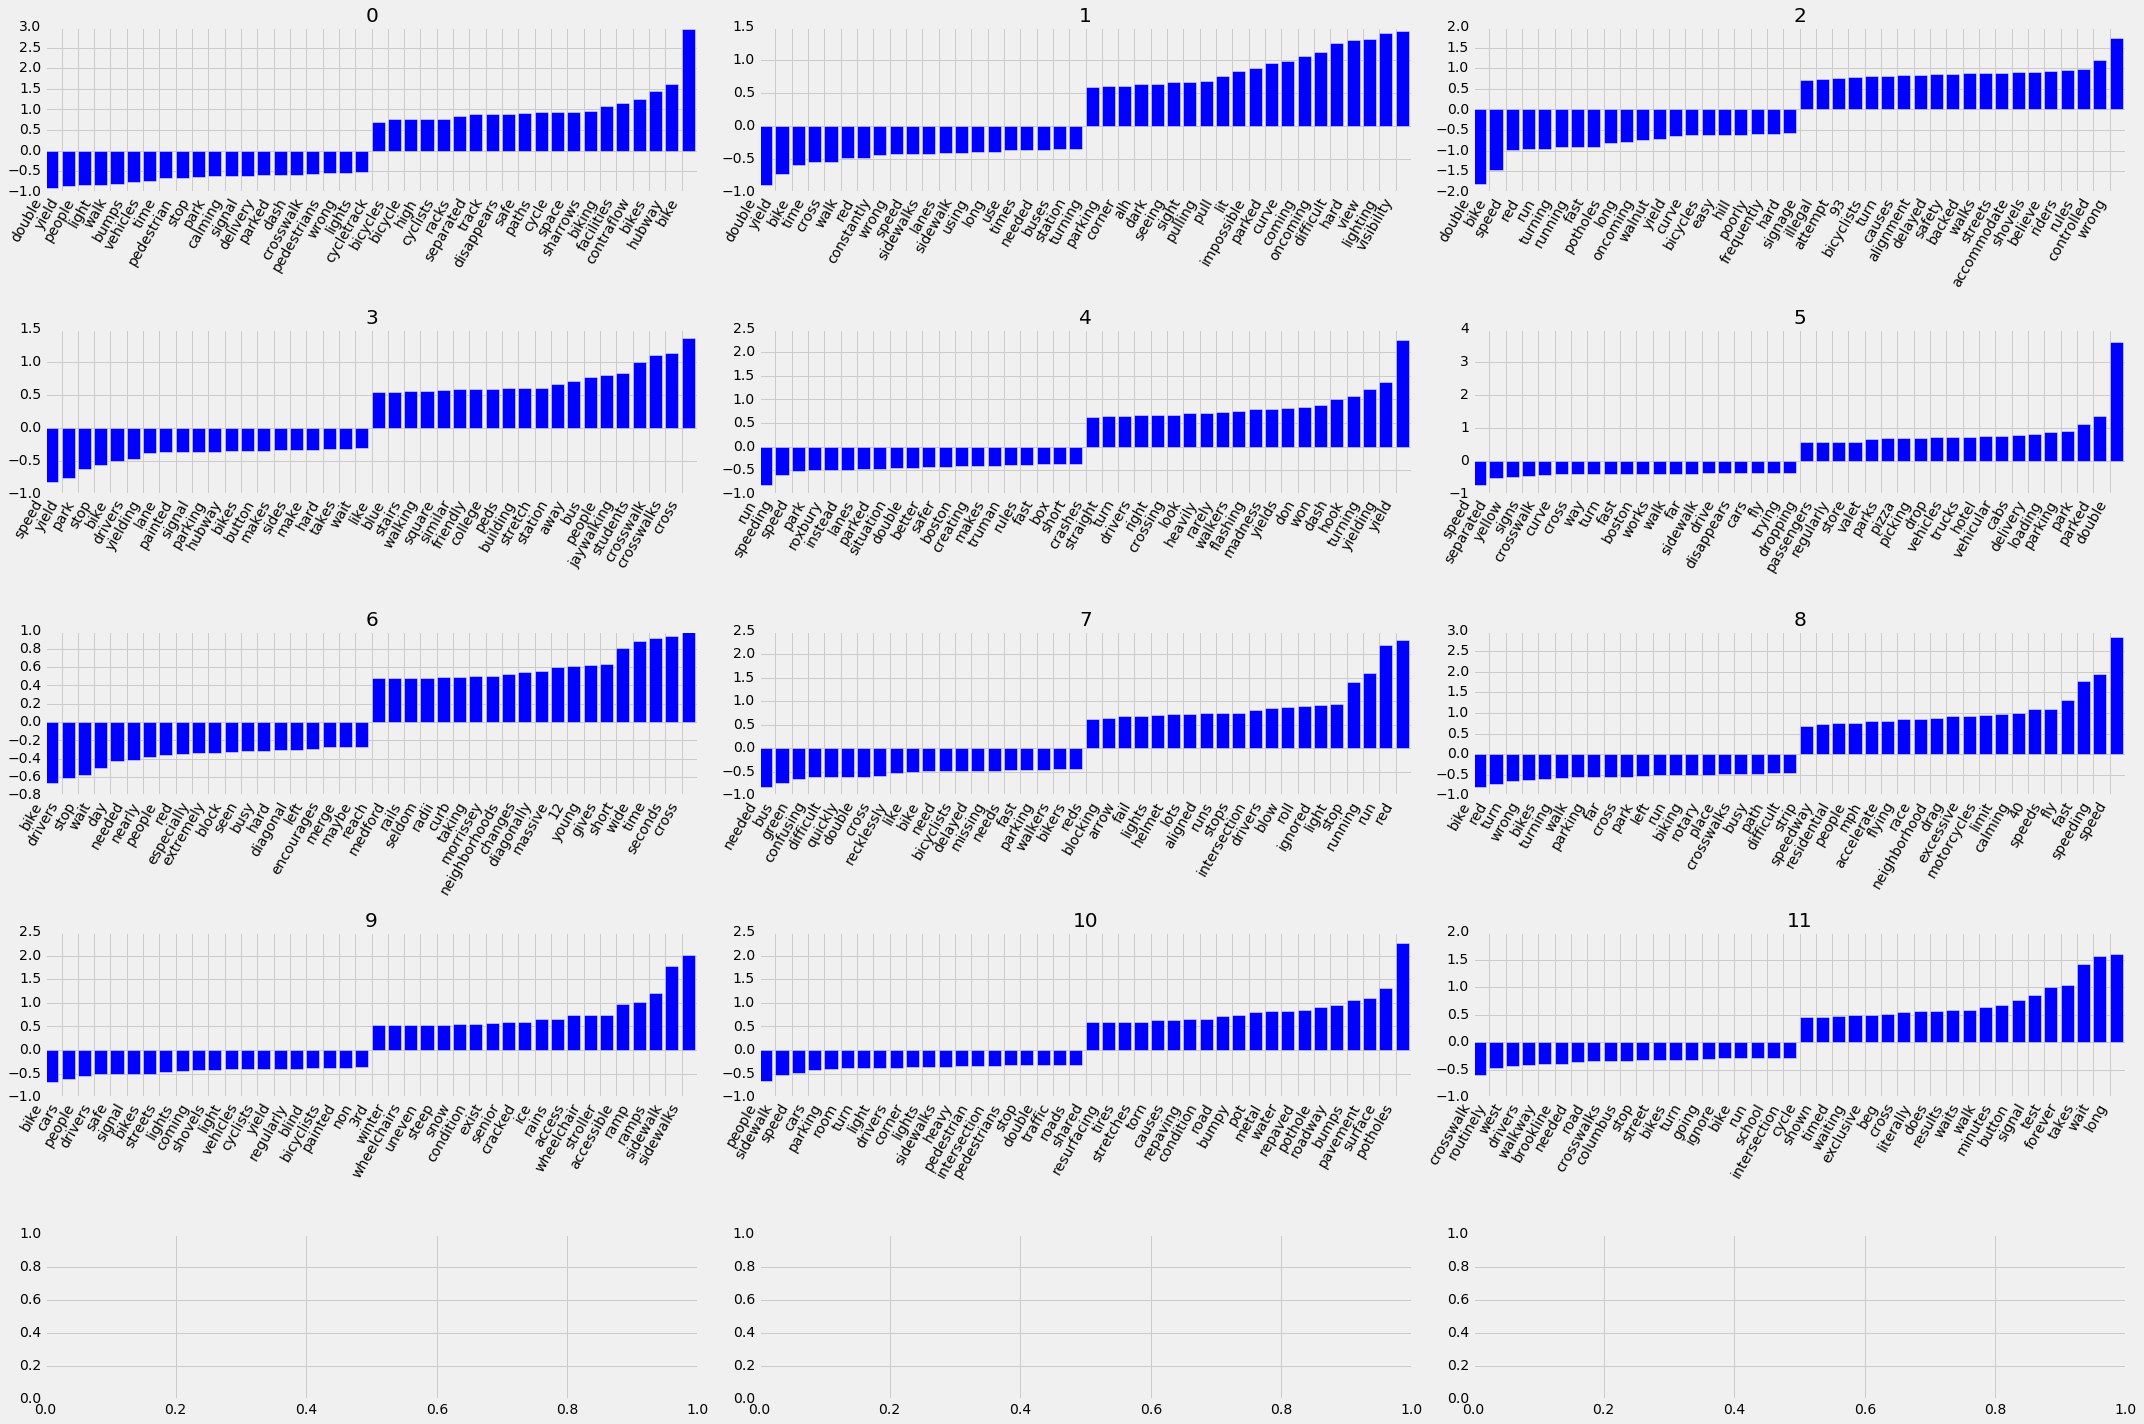

In [68]:
#plot features
lr = text_clf.named_steps['sgdclassifier']
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
n_classes = len(lr.classes_)
feature_names = np.array(text_clf.named_steps['tfidfvectorizer'].get_feature_names())
fig, axes = plt.subplots(n_classes // 3 + 1, 3, figsize=(30, 20))
for ax, coef, label in zip(axes.ravel(), lr.coef_, lr.classes_):
    ax.set_title(label)
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
plt.tight_layout()

In [69]:
#confusion matrix
y_pred = text_clf.predict (text_val)
print(confusion_matrix(y_val, y_pred))

[[194   1  15   0   3   4   0   3   3   2   2   1]
 [  2  69  19   2   4   0   0   1   6   2   0   0]
 [ 37  14 204  12  16   6   1  30  19  10   2   6]
 [  1   2  22  19   7   3   1   3   4   1   0   1]
 [  5   5  44   3  88   1   0  15  14   4   0   2]
 [  9   4  19   0   0  72   0   1   1   1   0   0]
 [  3   5  22   1   7   0   7   4   1   0   1   9]
 [  0   0  23   0   9   0   1 122   8   0   0   2]
 [  6   9  16   1   6   1   1   5 141   0   0   1]
 [  4   2  17   3   0   1   0   1   5  50   1   2]
 [ 11   0  12   0   0   1   0   0   4   2  34   0]
 [  0   0   9   1   1   0   0   4   0   0   0  45]]


In [72]:
for doc, category in zip(data['target'], y_pred):
    print('%r => %s' % (doc, category))

0 => 2
2 => 4
4 => 7
1 => 11
4 => 8
2 => 2
11 => 0
11 => 5
4 => 3
9 => 9
0 => 8
4 => 2
4 => 2
0 => 8
11 => 1
3 => 7
4 => 8
3 => 8
2 => 1
2 => 7
4 => 0
4 => 2
4 => 7
2 => 2
2 => 1
10 => 0
6 => 3
5 => 4
4 => 2
0 => 2
0 => 0
10 => 1
10 => 2
4 => 0
7 => 5
9 => 7
4 => 2
8 => 8
4 => 2
7 => 2
7 => 4
4 => 2
8 => 8
0 => 5
5 => 7
0 => 0
4 => 8
6 => 9
7 => 8
1 => 8
4 => 0
4 => 8
11 => 8
7 => 1
8 => 8
0 => 2
9 => 0
9 => 2
7 => 11
1 => 7
5 => 7
9 => 11
1 => 8
8 => 1
8 => 4
5 => 8
5 => 2
0 => 1
3 => 2
5 => 1
0 => 2
6 => 8
4 => 1
4 => 2
8 => 5
6 => 8
11 => 10
6 => 2
4 => 2
3 => 0
9 => 0
11 => 1
1 => 1
9 => 7
8 => 7
2 => 11
7 => 7
5 => 2
0 => 2
0 => 2
0 => 2
0 => 9
0 => 2
0 => 2
7 => 8
4 => 2
2 => 5
2 => 4
7 => 0
5 => 2
4 => 9
11 => 2
2 => 7
7 => 8
2 => 5
2 => 7
11 => 5
2 => 2
2 => 3
6 => 4
11 => 2
2 => 2
10 => 7
2 => 2
5 => 1
0 => 8
7 => 3
2 => 7
0 => 2
0 => 3
7 => 7
0 => 2
5 => 0
7 => 0
6 => 8
0 => 4
0 => 1
11 => 9
8 => 2
2 => 4
4 => 5
4 => 7
10 => 7
6 => 0
8 => 2
2 => 2
8 => 2
5 => 2
7 => 8
7 => 9


# Task5 - Clustering [10 points]

Apply LDA, NMF and K-Means to the whole dataset. Can you find clusters or topics that match well with some of the ground truth labels? Use ARI to compare the methods and visualize topics and clusters.

In [73]:
tfdidf = TfidfVectorizer(stop_words=my_stopwords, min_df=4, token_pattern=r"\b\w[\w’]+\b")
tfidf_matrix=tfidf.fit_transform(text_train)
print (tfidf_matrix.shape)
terms = tfidf.get_feature_names()

(6655, 1508)


In [74]:
print (data['target'].unique())

[ 0  2  4  1 11  9  3 10  6  5  7  8]


In [75]:
from sklearn.cluster import KMeans

num_clusters = 9

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 1min 8s


In [76]:
from sklearn.externals import joblib

joblib.dump(km,  'doc_cluster3.pkl')
#km = joblib.load('doc_cluster2.pkl')
#num_clusters = 8
#clusters = km.labels_.tolist()

['doc_cluster3.pkl']

In [77]:
len(text_train)

6655

In [78]:
newdata={'type': data['target'], 'comments': text_train, 'cluster': clusters} 
#val= np.arange(len(text_train))
frame=pd.DataFrame(newdata, columns=['type', 'cluster'])

In [79]:
print (frame['cluster'].value_counts())
frame['type'].unique()

0    2540
5     748
6     660
7     532
8     494
2     485
3     478
1     403
4     315
Name: cluster, dtype: int64


array([ 0,  2,  4,  1, 11,  9,  3, 10,  6,  5,  7,  8], dtype=int64)

In [80]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % terms[ind].split(' '))
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d labels:" % i, end='')
 
    foo = frame.ix[frame['cluster']==i]
    print (foo['type'].value_counts())
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: ['cars']
 ['traffic']
 ['people']
 ['st']
 ['road']
 ['intersection']


Cluster 0 labels:2     583
8     336
0     299
9     238
5     230
1     220
4     183
10    154
7      91
3      91
6      77
11     38
Name: type, dtype: int64


Cluster 1 words: ['stop']
 ['sign']
 ['drivers']
 ['signs']
 ['cars']
 ['people']


Cluster 1 labels:7     178
2      67
4      54
8      50
1      32
9       6
5       4
0       4
10      3
6       2
3       2
11      1
Name: type, dtype: int64


Cluster 2 words: ['crosswalk']
 ['pedestrians']
 ['yield']
 ['drivers']
 ['don']
 ['people']


Cluster 2 labels:4     174
2      86
3      76
8      43
9      26
1      25
7      24
6      22
10      4
5       4
11      1
Name: type, dtype: int64


Cluster 3 words: ['left']
 ['turn']
 ['lane']
 ['right']
 ['turning']
 ['cars']


Cluster 3 labels:2     195
4     100
1      56
0      46
7      32
8      13
10     12
5      11
6       6
3       4
11      2
9       1
Name: t

In [81]:
km=MiniBatchKMeans(n_clusters=8, init='random', 
                   n_init=1, init_size=1000, batch_size=1000)
tfidf = TfidfVectorizer(min_df=4, stop_words=my_stopwords)
X = tfidf.fit_transform(text_train.astype('U'))

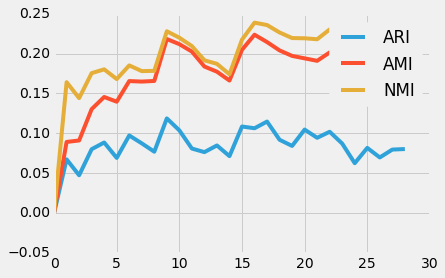

In [82]:
aris, nmis, amis = [], [], []
for i in range(1, 30):
    km = MiniBatchKMeans(n_clusters=i, init_size=1000, batch_size=1000).fit(X)
    ari = adjusted_rand_score(data[target], km.labels_)
    nmi = normalized_mutual_info_score(data[target], km.labels_)
    ami = adjusted_mutual_info_score(data[target], km.labels_)
    aris.append(ari)
    nmis.append(nmi)
    amis.append(ami)
plt.plot(aris, label="ARI")
plt.plot(amis, label="AMI")
plt.plot(nmis, label="NMI")
plt.legend()

In [86]:
vect = CountVectorizer(stop_words="english", min_df=4, token_pattern=r"\b\w[\w’]+\b")
X_train = vect.fit_transform(text_train)
print (X_train.shape)

(6655, 2050)


In [87]:
from sklearn.feature_extraction.text import TfidfTransformer
X_tfidf = TfidfTransformer().fit_transform(X_train)
from sklearn.decomposition import NMF
nmf10 = NMF(n_components=10, verbose=10, tol=0.001)
X_nmf_tfidf10 = nmf10.fit_transform(X_tfidf)

violation: 1.0
violation: 0.4579393880953951
violation: 0.2977509172309019
violation: 0.21835034779546228
violation: 0.1690044515081033
violation: 0.13083229701428273
violation: 0.10606538955148051
violation: 0.09255236613211097
violation: 0.08432693172854619
violation: 0.0791446428156034
violation: 0.07455054533904593
violation: 0.07036884404371475
violation: 0.06447571278919421
violation: 0.057892590861908684
violation: 0.051577443882839705
violation: 0.045472376456198296
violation: 0.03956518523429374
violation: 0.03365756556866103
violation: 0.02836017566534576
violation: 0.023702123264697172
violation: 0.019818264174439368
violation: 0.01668542551845946
violation: 0.014286884958092086
violation: 0.01229242253374099
violation: 0.010856589255589588
violation: 0.00970977242616132
violation: 0.008854319539680541
violation: 0.008231677886798254
violation: 0.007778082231552858
violation: 0.007441279185285277
violation: 0.0071949717992045486
violation: 0.007030499958034926
violation: 0.0

In [88]:
def plot_important_features2(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

In [89]:
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)

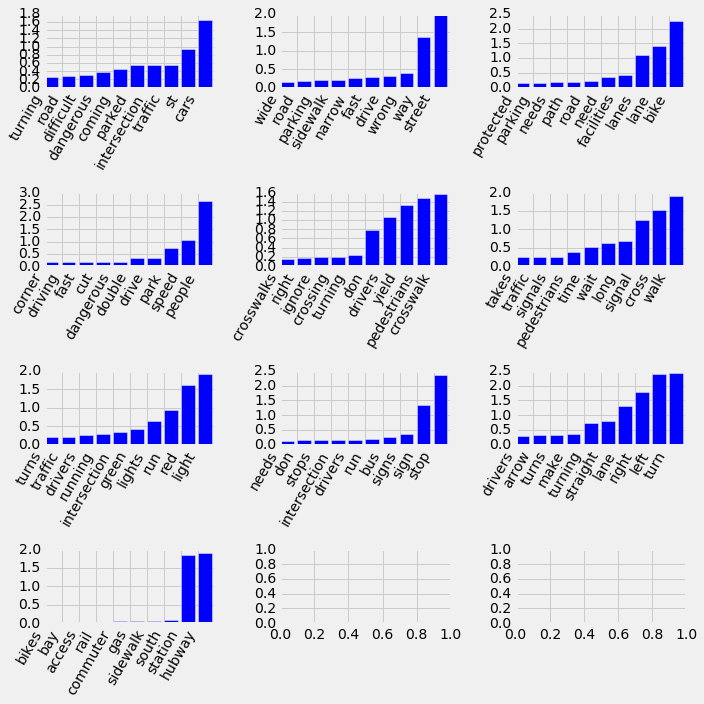

In [90]:
large_comp_inds = np.argsort(X_nmf_tfidf10.mean(axis=0))[-12:][::-1]

feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), nmf10.components_[large_comp_inds, :]):
    plot_important_features2(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

In [91]:
def print_topics(topics, feature_names, components, topics_per_chunk=6,
                 n_words=20):
    sorting = np.argsort(components, axis=1)[:, ::-1]
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

In [92]:
sorting = np.argsort(nmf10.components_, axis=1)[:, ::-1]
print_topics(large_comp_inds, feature_names, sorting)

topic 8       topic 2       topic 1       topic 6       topic 3       topic 9       
--------      --------      --------      --------      --------      --------      
comm          ban           repaved       zoom          canterbury    press         
closely       victory       northeastern  hubway        strip         wheels        
allows        coupled       additional    approaches    highly        shovel        
ignore        riders        speed         patch         form          club          
rights        everett       blow          past          existing      causes        
riders        confused      ignored       passengers    scary         hotel         
ride          birmingham    sped          building      scariest      boylston      
regulations   careful       specifically  passenger     disappears    create        
regard        replace       obstructs     better        adams         shouldn       
careful       plaza         marking       ambiguous     adding   

In [93]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch")
X_lda = lda.fit_transform(X_train)

In [94]:
lda.fit(X_train)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=1, n_topics=10, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

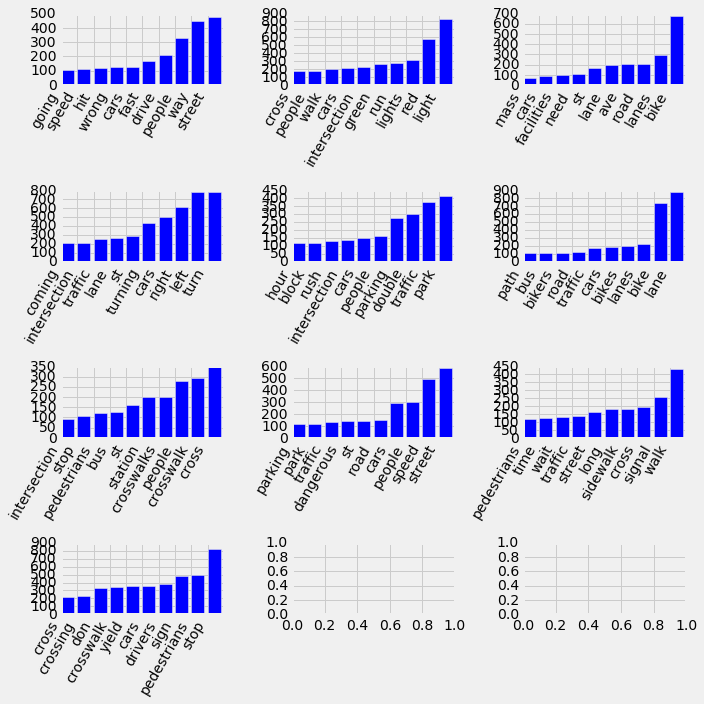

In [95]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lda.components_):
    plot_important_features2(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

In [96]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
print_topics(np.argsort(X_lda.sum(axis=0))[::-1][:10], feature_names, sorting, topics_per_chunk=8)

topic 5       topic 9       topic 8       topic 0       topic 7       topic 3       topic 6       topic 4       
--------      --------      --------      --------      --------      --------      --------      --------      
segment       incline       safe          avenue        hwy           death         jamaica       starting      
poplar        travelling    edgerly       distance      turn          obey          market        bypass        
blow          collision     paul          blocks        better        owner         exeter        absolutely    
uber          facing        lead          twice         club          uber          protected     entirety      
haviland      pleasant      events        pull          ban           high          helmets       correct       
ubers         turing        preschool     carriage      union         ubers         invites       understand    
quickly       came          left          improved      arboretum     ruggles       obstructs   

# Task6 - Model 3 [30 points]

Improve the class definition for REQUESTTYPE by using the results of the clustering and results of the previous classification model. Re-assign labels using either the results of clustering or using keywords that you found during data exploration. The labels must be semantically meaningful.
The data has a large “other” category. Apply the topic modeling and clustering techniques to this subset of the data to find possible splits of this class.
Report accuracy using macro average f1 score (should be above .53) 


In [97]:
# Add your code for task 6 here. You may use multiple cells. 
mask = data['REQUESTTYPE'] != "of something that is not listed here"
data2=data[~mask]
print (data2.shape)
text_train2 = data2['COMMENTS']
y=data2['target']

(1427, 12)


In [98]:
tfdidf = TfidfVectorizer(stop_words=my_stopwords, min_df=4, token_pattern=r"\b\w[\w’]+\b")
tfidf_matrix=tfidf.fit_transform(text_train2)
print (tfidf_matrix.shape)
terms = tfidf.get_feature_names()

(1427, 756)


In [99]:
from sklearn.cluster import KMeans
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

Wall time: 7.49 s


In [100]:
from sklearn.externals import joblib

joblib.dump(km,  'doc_cluster4.pkl')

#km = joblib.load('doc_cluster2.pkl')
#num_clusters = 8
#clusters = km.labels_.tolist()

['doc_cluster4.pkl']

In [101]:
newdata={'type': y, 'comments': text_train2, 'cluster': clusters} 
frame=pd.DataFrame(newdata, columns=['type', 'cluster'])
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % terms[ind].split(' '))
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d labels:" % i, end='')
 
    foo = frame.ix[frame['cluster']==i]
    print (foo['type'].value_counts())
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: ['lane']
 ['left']
 ['turn']
 ['right']
 ['straight']
 ['lanes']


Cluster 0 labels:2    202
Name: type, dtype: int64


Cluster 1 words: ['way']
 ['wrong']
 ['street']
 ['drive']
 ['people']
 ['road']


Cluster 1 labels:2    133
Name: type, dtype: int64


Cluster 2 words: ['light']
 ['stop']
 ['cross']
 ['pedestrians']
 ['walk']
 ['traffic']


Cluster 2 labels:2    317
Name: type, dtype: int64


Cluster 3 words: ['people']
 ['cars']
 ['street']
 ['intersection']
 ['traffic']
 ['parking']


Cluster 3 labels:2    775
Name: type, dtype: int64






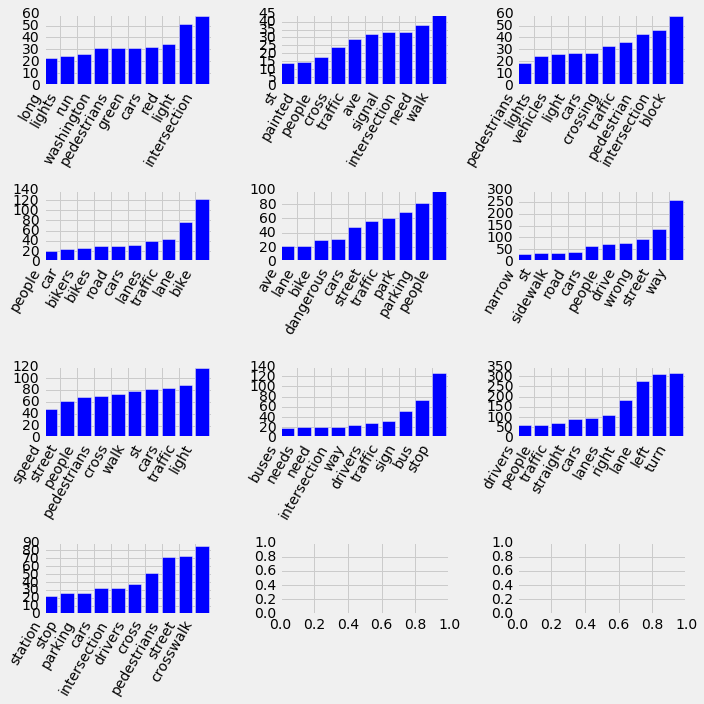

In [102]:
vect = CountVectorizer(stop_words="english", min_df=4)
X_train = vect.fit_transform(text_train2)
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch")
X_lda = lda.fit_transform(X_train)
lda.fit(X_train)
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lda.components_):
    plot_important_features2(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

In [107]:
y=data['target']

The following code sets the category regarding the walk signal taking too long(3), to the crossing too cateogry (10) and the one regarding running a red(7) to speeding (8) since the topics/clusters/data exploration seem to suggest they should be brought together.

In [108]:
for i in np.arange(y.shape[0]):
    col = y.iloc[i]
    if col == 7:  
        y.iloc[i] = 8
    elif col == 3: 
        y.iloc[i] = 10

C:\Users\Fatima\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [109]:
data['target']=y

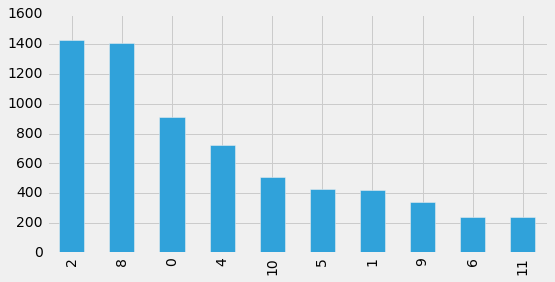

In [110]:
plt.figure(figsize=(8, 4))
(y.value_counts()).plot(kind='bar')

# Assertion

In [111]:
text_train=data['COMMENTS']
text_train_sub, text_val, y_train_sub, y_val = train_test_split(
    text_train, data['target'], stratify=data['target'], random_state=0)

In [112]:
text_clf = make_pipeline(TfidfVectorizer(min_df=4, stop_words=my_stopwords, token_pattern=r"\b\w[\w’]+\b"),
                    SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))
text_clf.fit(text_train_sub.astype('U'),y_train_sub)
print ('F1-score: %f'% f1_score(y_val, text_clf.predict(text_val.astype('U')), average='macro'))
final_accuracy = f1_score(y_val, text_clf.predict(text_val.astype('U')), average='macro')
final_accuracy

F1-score: 0.592428


0.5924278015673432

The f1-score actually goes down with these new classifications so obviously these new categories are not helpful

In [113]:
assert final_accuracy > .53

# Extra Credit [Up to +20 points]

Use a word embedding representation like word2vec for step 3 and or step 6. 

In [ ]:
# Add your code for extra credit here. You may use multiple cells. 

